#  Imports




In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#  Load Data

In [30]:

df = pd.read_csv("unicorns.csv")
df.columns = [col.strip().replace(" ", "_").replace("($B)", "B") for col in df.columns]


# Basic Data Overview

In [31]:
# Shape of dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Column data types and non-null counts
print("\nData Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Unique counts
print("\nUnique Countries:", df['Country'].nunique())
print("Unique Industries:", df['Industry'].nunique())

Total Rows: 1186
Total Columns: 7

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      1186 non-null   object
 1   Valuation_B  1186 non-null   object
 2   Date_Joined  1186 non-null   object
 3   Country      1186 non-null   object
 4   City         1186 non-null   object
 5   Industry     1186 non-null   object
 6   Investors    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB
None

Summary Statistics:
       Company Valuation_B Date_Joined        Country           City Industry  \
count     1186        1186        1186           1186           1186     1186   
unique    1183         222         695             48            286       34   
top       Bolt          $1   7/13/2021  United States  San Francisco  Fintech   
freq         2         271           9            636            168      239   

      

#  Data Cleaning


In [32]:

df['Valuation_B'] = df['Valuation_B'].str.replace('$', '', regex=False).astype(float)
df['Date_Joined'] = pd.to_datetime(df['Date_Joined'])
df['Year_Joined'] = df['Date_Joined'].dt.year
df['Month_Joined'] = df['Date_Joined'].dt.month
df = df.dropna()


# Sector-wise Analysis

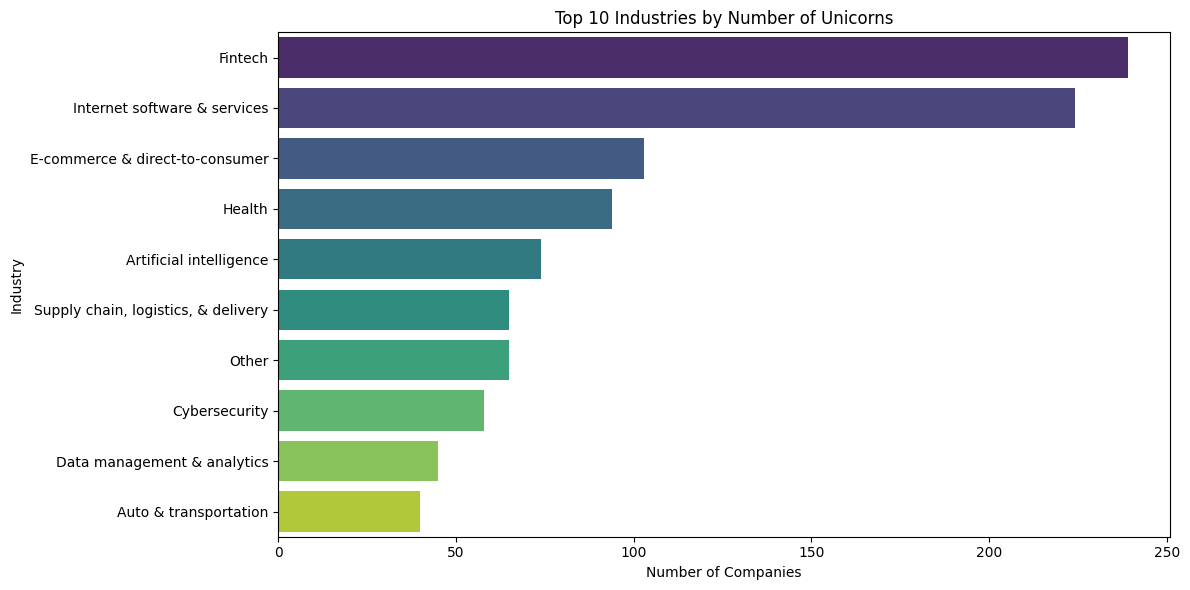

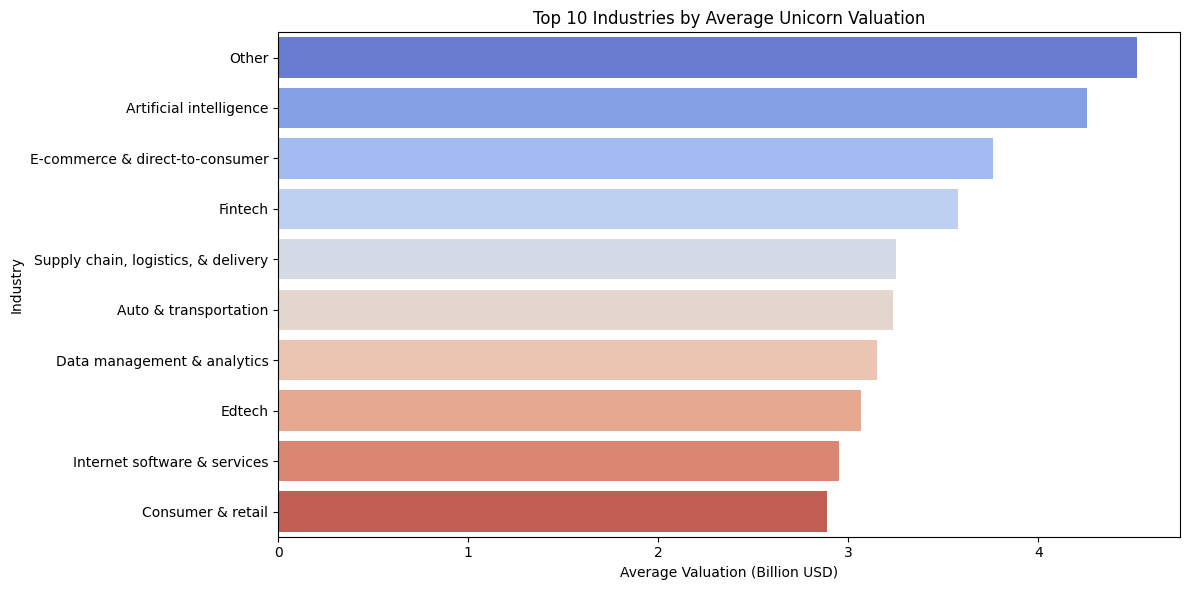

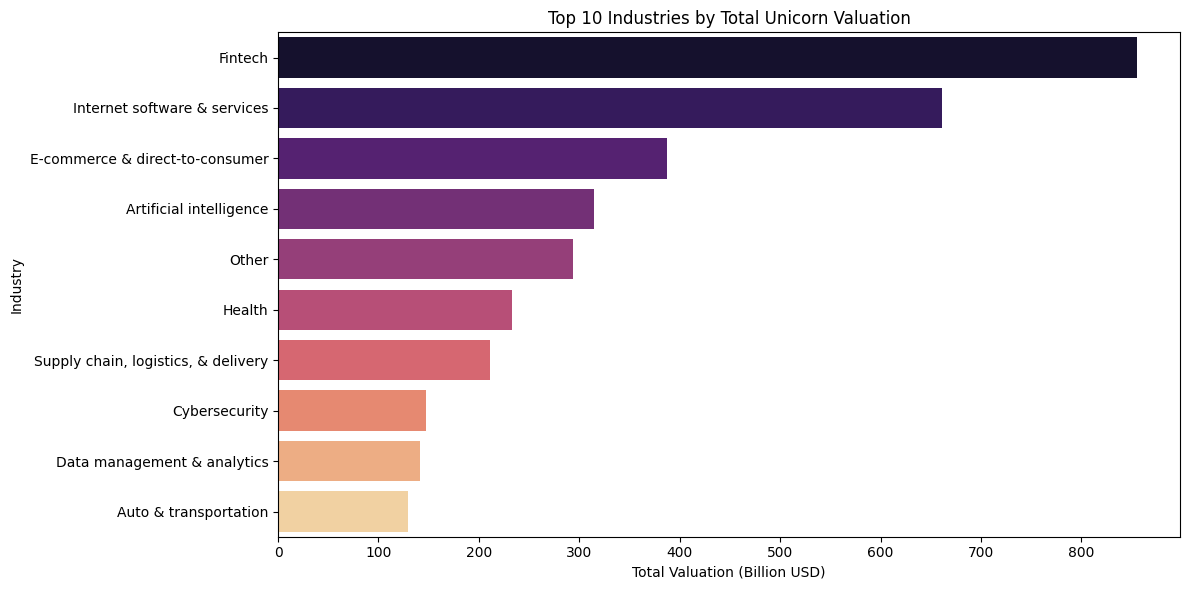

In [39]:

#  Count of unicorns per sector
sector_counts = df['Industry'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.values, y=sector_counts.index, palette='viridis')
plt.title("Top 10 Industries by Number of Unicorns")
plt.xlabel("Number of Companies")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

# Average valuation per sector
sector_avg = df.groupby('Industry')['Valuation_B'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_avg.values, y=sector_avg.index, palette='coolwarm')
plt.title("Top 10 Industries by Average Unicorn Valuation")
plt.xlabel("Average Valuation (Billion USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

# Total valuation per sector (optional)
sector_total = df.groupby('Industry')['Valuation_B'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_total.values, y=sector_total.index, palette='magma')
plt.title("Top 10 Industries by Total Unicorn Valuation")
plt.xlabel("Total Valuation (Billion USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

# Country-wise Analysis

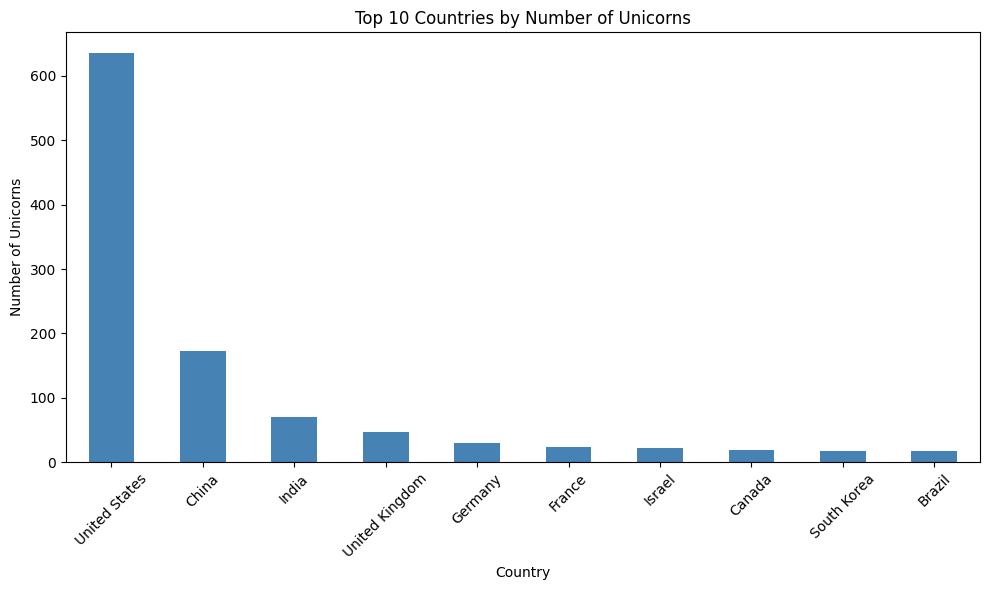

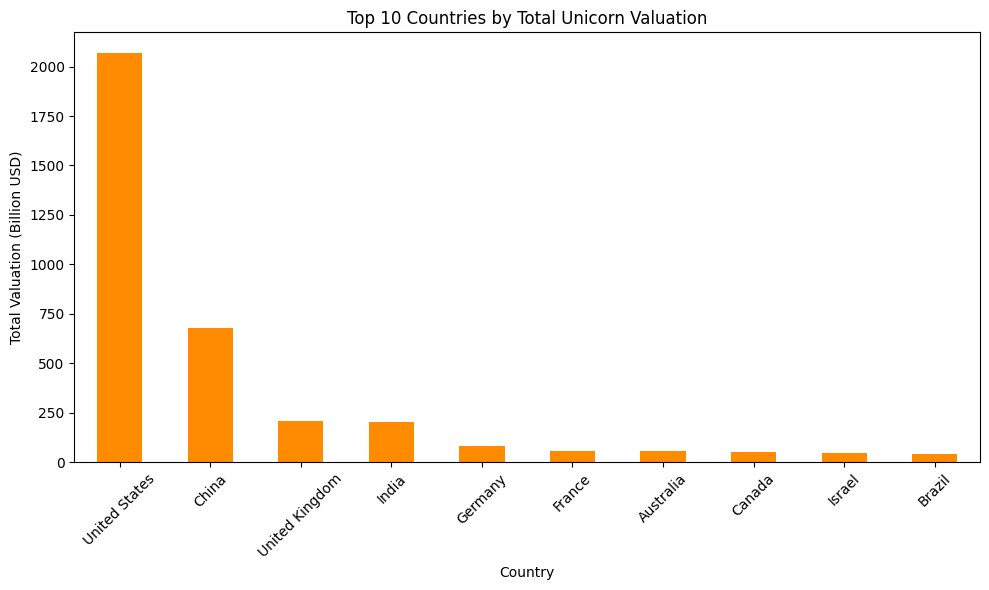

In [34]:
# Country-wise unicorn counts
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='steelblue')
plt.title("Top 10 Countries by Number of Unicorns")
plt.xlabel("Country")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Country-wise valuation totals
country_valuation = df.groupby('Country')['Valuation_B'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
country_valuation.plot(kind='bar', color='darkorange')
plt.title("Top 10 Countries by Total Unicorn Valuation")
plt.ylabel("Total Valuation (Billion USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Time-Series Analysis


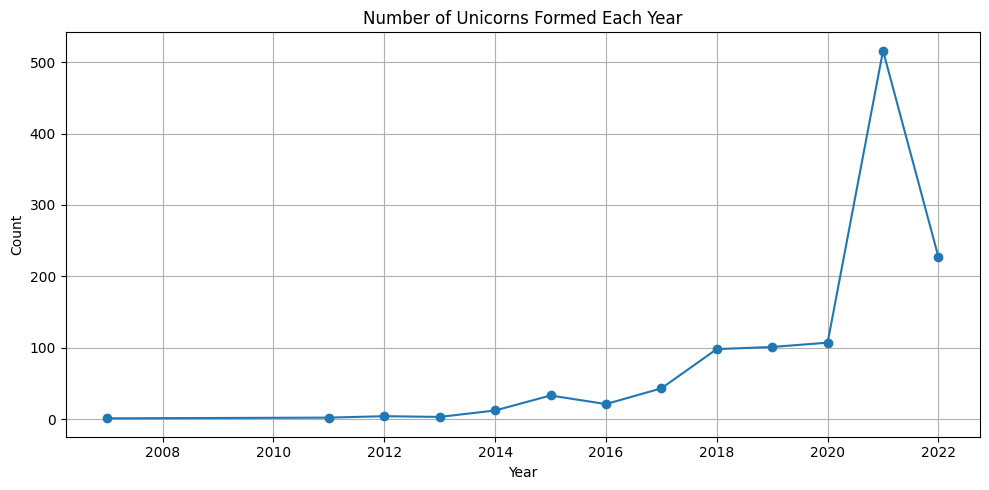

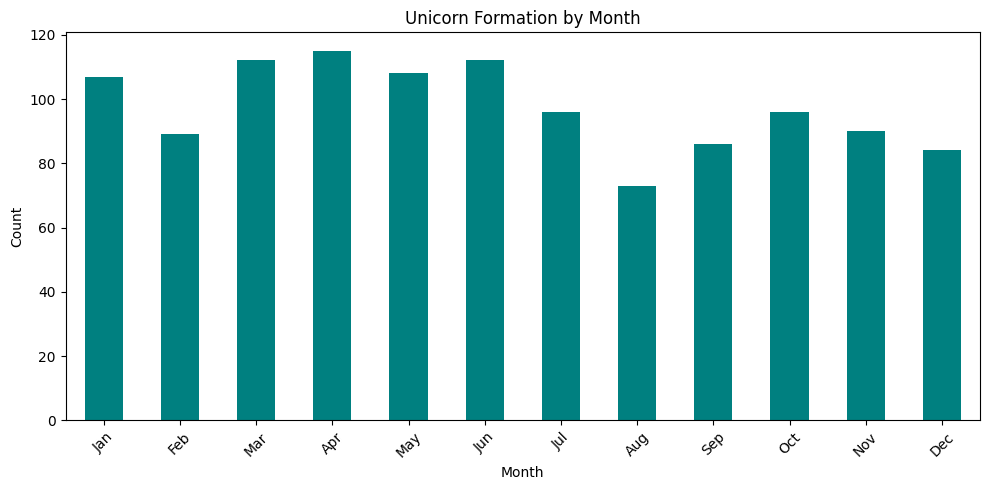

In [35]:
# Yearly unicorn formation trend
plt.figure(figsize=(10, 5))
df['Year_Joined'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Unicorns Formed Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly analysis (across all years)
plt.figure(figsize=(10, 5))
df['Month_Joined'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Unicorn Formation by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


#  Valuation Analysis

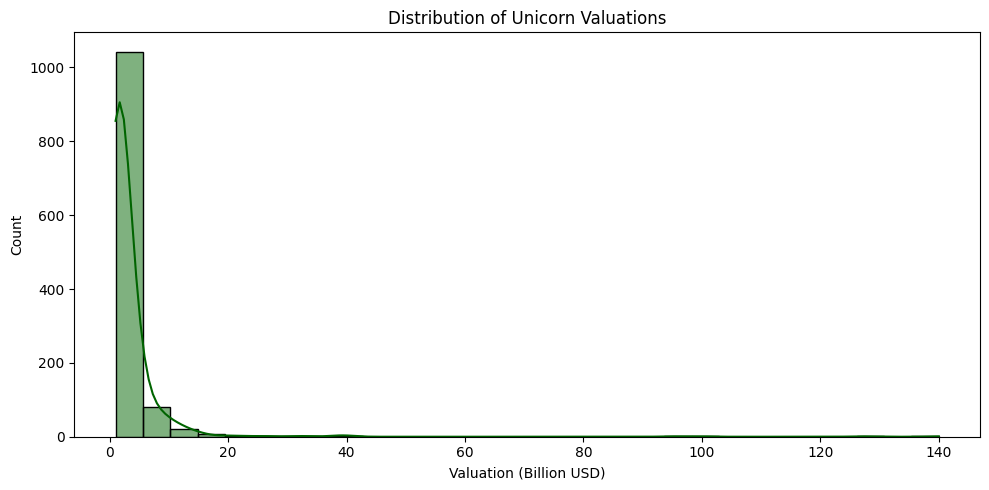

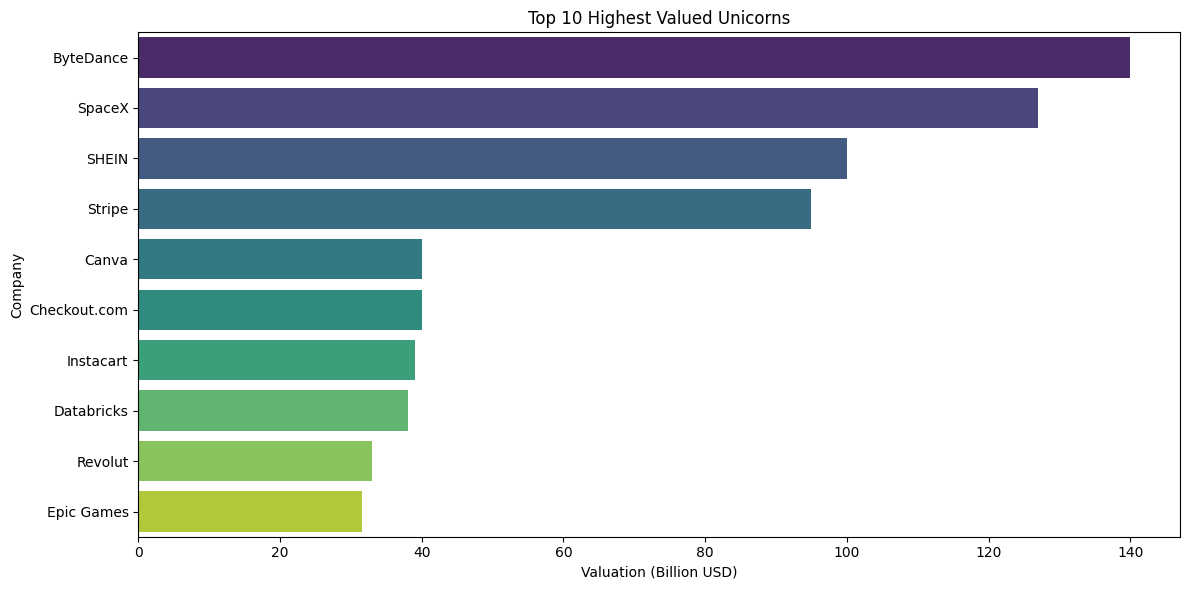

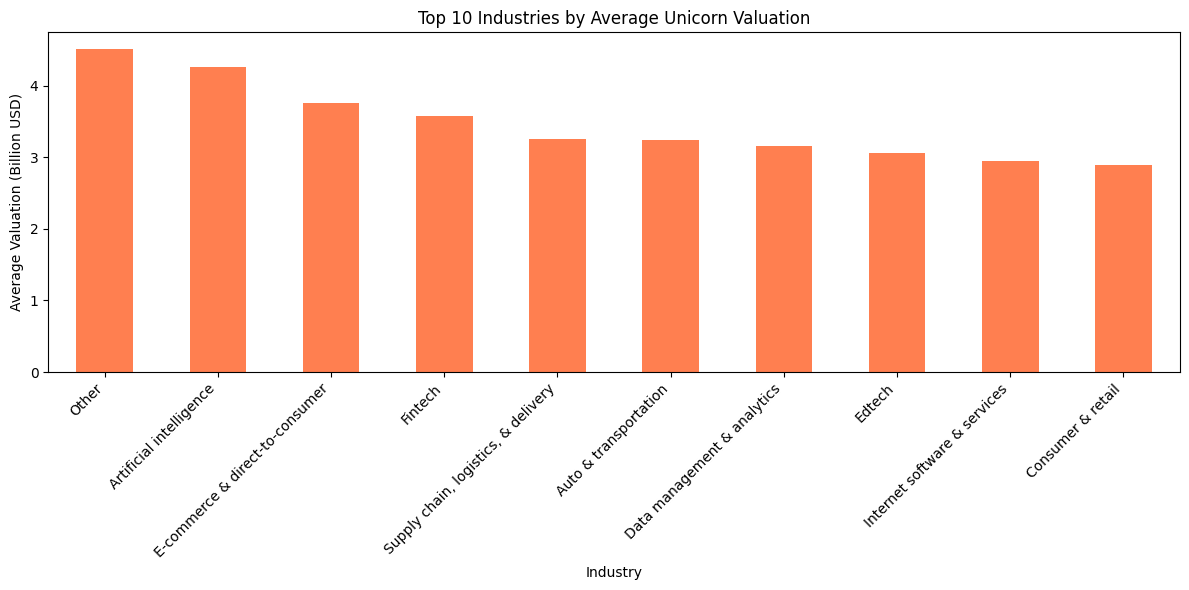

In [36]:
# Histogram of valuations
plt.figure(figsize=(10, 5))
sns.histplot(df['Valuation_B'], kde=True, bins=30, color='darkgreen')
plt.title("Distribution of Unicorn Valuations")
plt.xlabel("Valuation (Billion USD)")
plt.tight_layout()
plt.show()

# Top 10 highest valued companies
top_10 = df.sort_values(by='Valuation_B', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Valuation_B', y='Company', data=top_10, palette='viridis')
plt.title("Top 10 Highest Valued Unicorns")
plt.xlabel("Valuation (Billion USD)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# Average valuation per industry
industry_avg = df.groupby('Industry')['Valuation_B'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
industry_avg.plot(kind='bar', color='coral')
plt.title("Top 10 Industries by Average Unicorn Valuation")
plt.ylabel("Average Valuation (Billion USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Investor Analysis

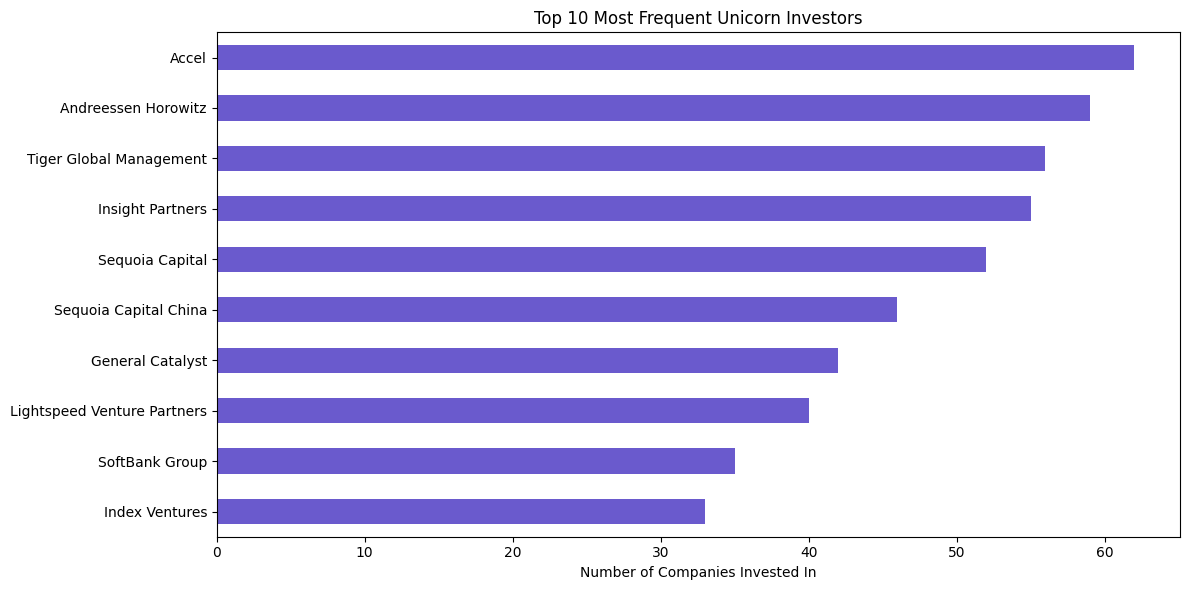

In [37]:
# If 'Investors' column exists
if 'Investors' in df.columns:
    investor_series = df['Investors'].str.split(',', expand=True).stack().str.strip()
    top_investors = investor_series.value_counts().head(10)

    plt.figure(figsize=(12, 6))
    top_investors.plot(kind='barh', color='slateblue')
    plt.title("Top 10 Most Frequent Unicorn Investors")
    plt.xlabel("Number of Companies Invested In")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No 'Investors' column found for investor analysis.")


# Top 10 Countries by Number of Unicorns

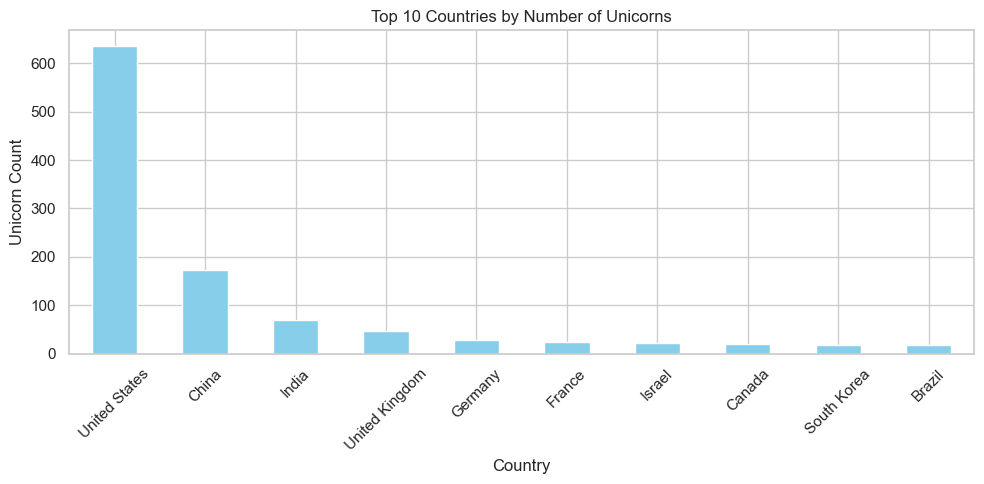

In [43]:
plt.figure(figsize=(10, 5))
df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Number of Unicorns")
plt.ylabel("Unicorn Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Top 10 Industries by Total Valuation

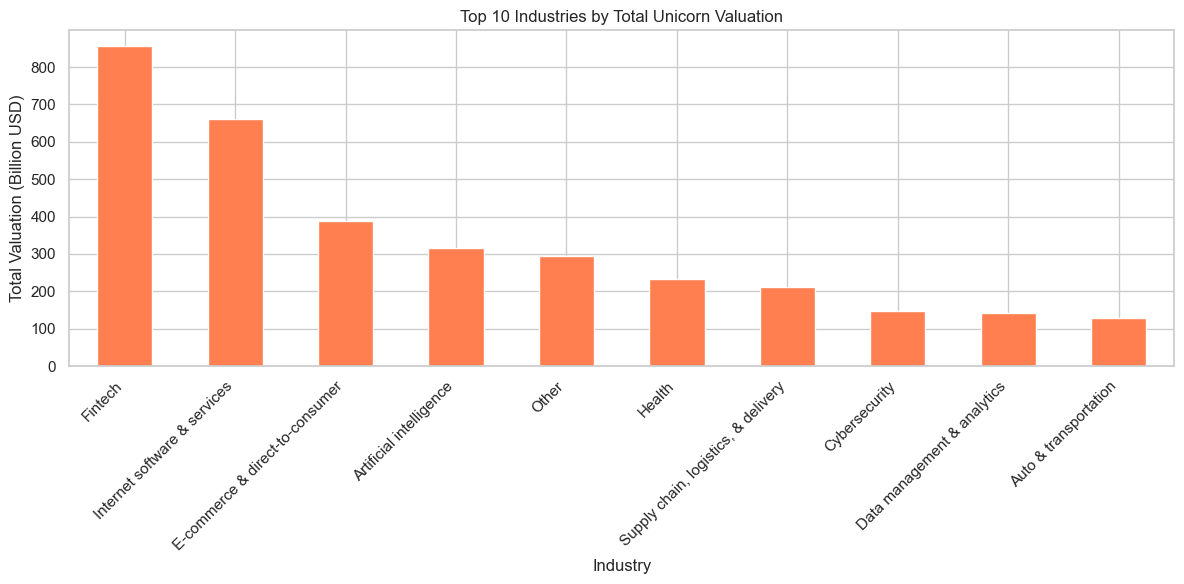

In [42]:
industry_valuation = df.groupby('Industry')['Valuation_B'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
industry_valuation.plot(kind='bar', color='coral')
plt.title("Top 10 Industries by Total Unicorn Valuation")
plt.ylabel("Total Valuation (Billion USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Country Share of Unicorns (Top 5)

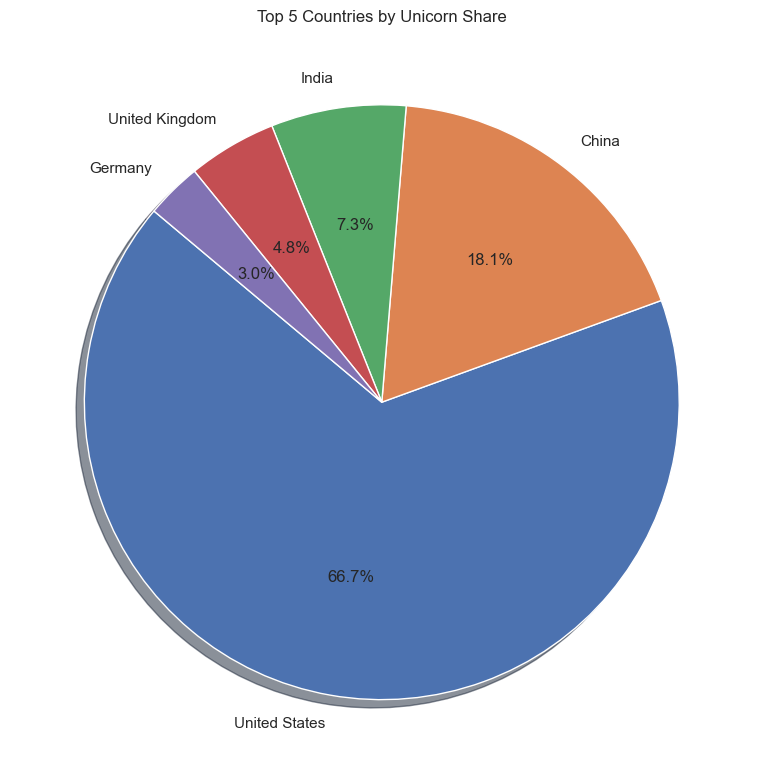

In [44]:
top5_countries = df['Country'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_countries, labels=top5_countries.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Top 5 Countries by Unicorn Share")
plt.tight_layout()
plt.show()


# Industry Share (Top 6 Sectors)

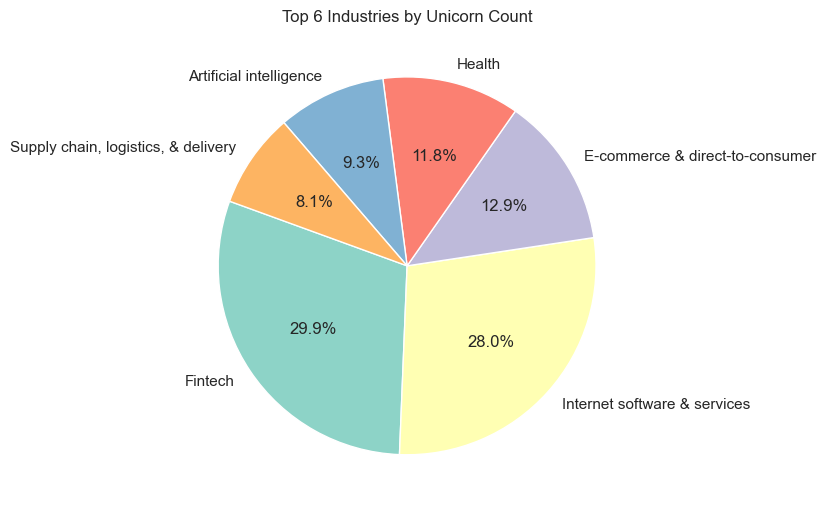

In [45]:
top6_industries = df['Industry'].value_counts().head(6)
plt.figure(figsize=(8, 8))
plt.pie(top6_industries, labels=top6_industries.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'))
plt.title("Top 6 Industries by Unicorn Count")
plt.tight_layout()
plt.show()


#  Unicorn Formation Trend by Year

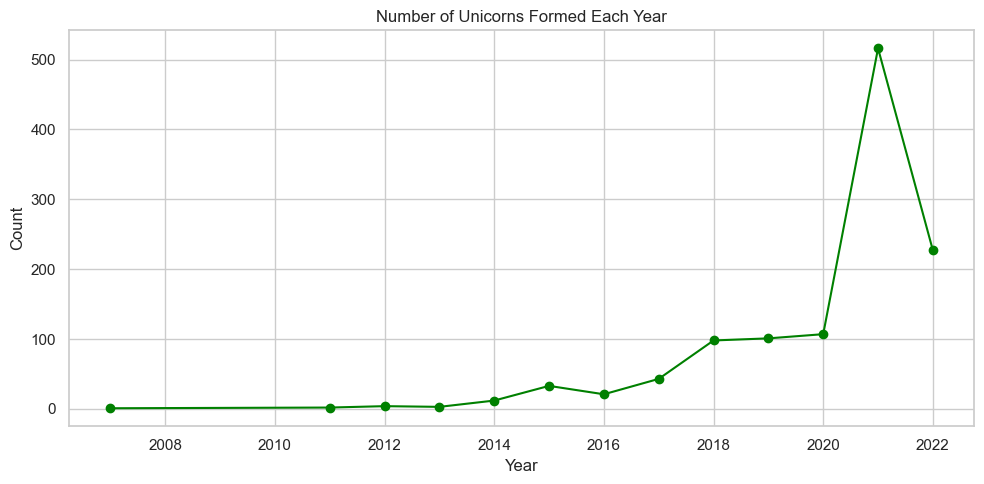

In [46]:
yearly_counts = df['Year_Joined'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='green')
plt.title("Number of Unicorns Formed Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


# Distribution of Valuation



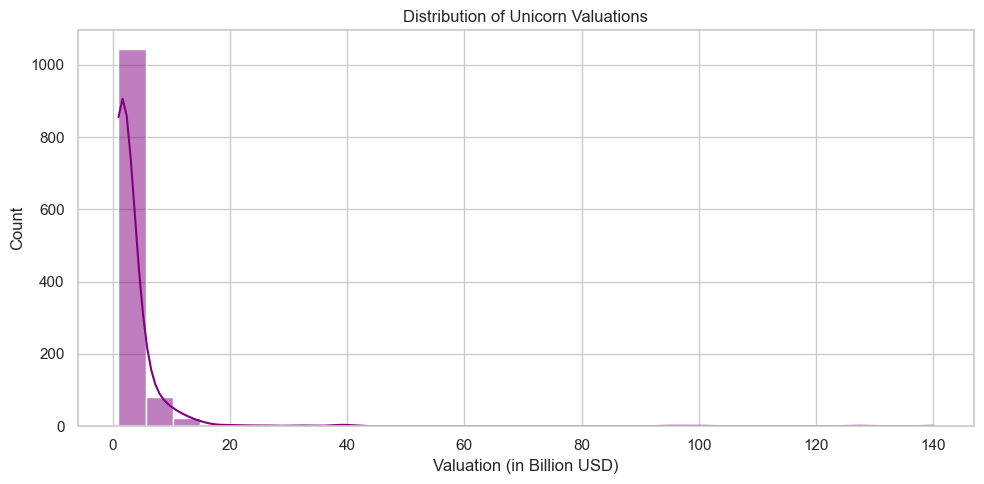

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Valuation_B'], bins=30, kde=True, color='purple')
plt.title("Distribution of Unicorn Valuations")
plt.xlabel("Valuation (in Billion USD)")
plt.tight_layout()
plt.show()


#  Insights

In [48]:
# Most dominant country by unicorn count
top_country = df['Country'].value_counts().idxmax()
top_country_count = df['Country'].value_counts().max()

# Most dominant industry
top_industry = df['Industry'].value_counts().idxmax()
top_industry_count = df['Industry'].value_counts().max()

# Year with most unicorns
top_year = df['Year_Joined'].value_counts().idxmax()
top_year_count = df['Year_Joined'].value_counts().max()

# Country with highest total valuation
country_valuation = df.groupby('Country')['Valuation_B'].sum()
top_val_country = country_valuation.idxmax()
top_val_amount = country_valuation.max()

# Industry with highest average valuation
industry_avg_val = df.groupby('Industry')['Valuation_B'].mean()
top_avg_industry = industry_avg_val.idxmax()
top_avg_val = industry_avg_val.max()

# Display findings
print(f"🌍 Top Country by Unicorn Count: {top_country} ({top_country_count} companies)")
print(f"🏭 Top Industry by Count: {top_industry} ({top_industry_count} companies)")
print(f"📈 Peak Year: {top_year} ({top_year_count} new unicorns)")
print(f"💰 Country with Highest Total Valuation: {top_val_country} (${top_val_amount:.2f}B)")
print(f"🏆 Industry with Highest Avg. Valuation: {top_avg_industry} (${top_avg_val:.2f}B)")


🌍 Top Country by Unicorn Count: United States (636 companies)
🏭 Top Industry by Count: Fintech (239 companies)
📈 Peak Year: 2021 (516 new unicorns)
💰 Country with Highest Total Valuation: United States ($2069.89B)
🏆 Industry with Highest Avg. Valuation: Other ($4.52B)
